 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns



/var/folders/nz/mnznr67j12x2tzz6qh3q2yjm0000gn/T/ipykernel_780/2509603300.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.duplicated()
whale_returns.drop_duplicates()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns

/var/folders/nz/mnznr67j12x2tzz6qh3q2yjm0000gn/T/ipykernel_780/1039771929.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_returns.head()
algo_returns
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [8]:
algo_returns = algo_returns.dropna()

In [9]:
algo_returns

# Calculate the daily standard deviations of all portfolios
daily_std = algo_returns.std()
daily_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

<Axes: xlabel='Date'>

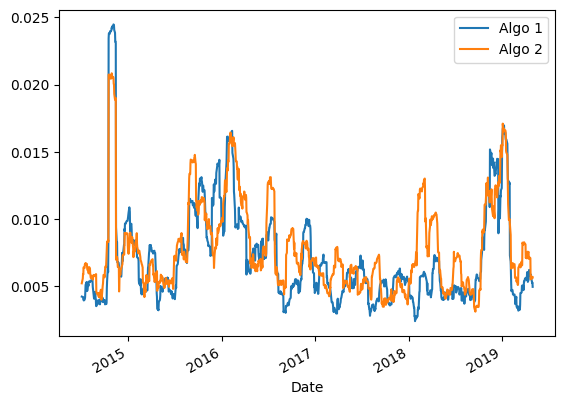

In [10]:
algo_returns.rolling(window=21).std().plot()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history

/var/folders/nz/mnznr67j12x2tzz6qh3q2yjm0000gn/T/ipykernel_780/800770461.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp_tsx_history = pd.read_csv(sp_tsx_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [12]:
# clean $ sign 
sp_tsx_history['Close'].str.replace("$","").str.replace(",","")


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: object

In [13]:
# how to save?
closed_clean = sp_tsx_history['Close'].str.replace("$","").str.replace(",","")
closed_clean
# this is not back into the original dataframe yet?
sp_tsx_history["Close"] = closed_clean

In [14]:
sp_tsx_history["Close"] = sp_tsx_history['Close'].str.replace("$","")

In [15]:
# check the returns for S&P TSX 60
sp_tsx_history

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [16]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [17]:
# dataypes
num1 = 10
type(num1)
# diff between int and float?
# float has decimal points
num2 = 10.0
type(num2)

num3 = "10"
type(num3)

# = saves a VALUE to a VARIABLE
# var = value

str

In [18]:
# saving variables
str1 = "hello"
print(str1)
str1 = "SOME NEW ALUE"
print(str1)

hello
SOME NEW ALUE


In [19]:
str1

'SOME NEW ALUE'

In [20]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype("float")

In [21]:
sp_tsx_history.dtypes

Close    float64
dtype: object

In [22]:
new_df = sp_tsx_history["Close"].astype("float")
new_df

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: float64

In [23]:
sp_tsx_history

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [24]:
# Drop nulls
sp_tsx_history.dropna()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [25]:
# Rename `Close` Column to be specific to this portfolio.
sp_tax_history = sp_tsx_history.dropna().copy()
sp_tsx_history.rename(columns={"Close": "S&P TSX 60"})


,S&P TSX 60
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [26]:
# calculate daily return for S&P tsx using percent change 
daily_returns = sp_tsx_history.pct_change()
daily_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [27]:
daily_returns = daily_returns.dropna().copy()
daily_returns

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [28]:
daily_returns = daily_returns.rename(columns={"Close": "S&P TSX 60"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [29]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
column_appended_data = pd.concat([whale_returns, algo_returns,daily_returns], axis="columns", join="inner")
column_appended_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

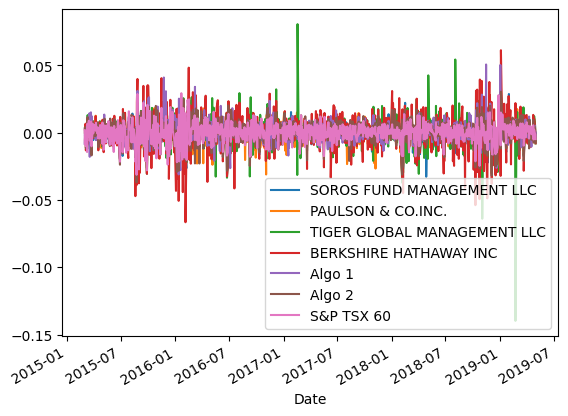

In [30]:
# Plot daily returns of all portfolios
column_appended_data.plot()

#### Calculate and Plot cumulative returns.

In [31]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + column_appended_data).cumprod()
cumulative_returns 



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,0.991842,1.003200,1.001950
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.989916,1.002247,0.993404
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.981414,1.004669,0.990055
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.980476,1.009012,0.991386
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.975616,0.997449,0.981500
...,...,...,...,...,...,...,...
2019-04-25,1.118163,0.754821,0.840272,1.348932,1.994738,1.200218,1.072591
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.000684,1.206526,1.075009
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.011104,1.209940,1.074162


---

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,0.991842,1.003200,1.001950
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.989916,1.002247,0.993404
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.981414,1.004669,0.990055
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.980476,1.009012,0.991386
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.975616,0.997449,0.981500
...,...,...,...,...,...,...,...
2019-04-25,1.118163,0.754821,0.840272,1.348932,1.994738,1.200218,1.072591
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.000684,1.206526,1.075009
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.011104,1.209940,1.074162


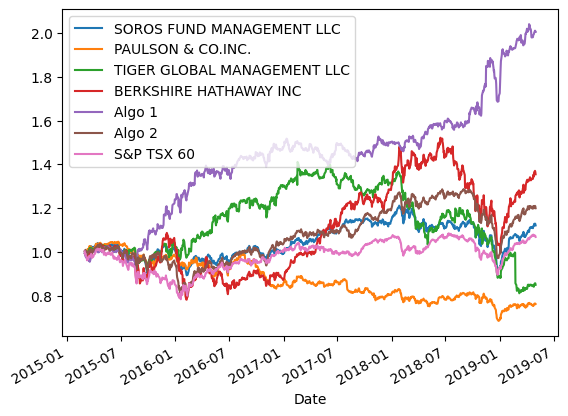

In [32]:
# Plot cumulative returns
cumulative_returns.plot()
cumulative_returns 


### Create a box plot for each portfolio


### Calculate Standard Deviations

In [33]:
# Calculate the daily standard deviations of all portfolios
daily_std = whale_returns .std()
daily_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [34]:
daily_std = algo_returns .std()
daily_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [35]:
# Calculate the daily standard deviations of S&P TSX 60
daily_std = daily_returns.std()
daily_std.head()




S&P TSX 60    0.006637
dtype: float64

In [36]:
# Determine which portfolios are riskier than the S&P TSX 60
# Std. deviation for "whale returns" are higher than "algo returns" and "S&P TSX 60"
# Thus "whale returns" riskier than the S&P TSX 60

<Axes: xlabel='Date'>

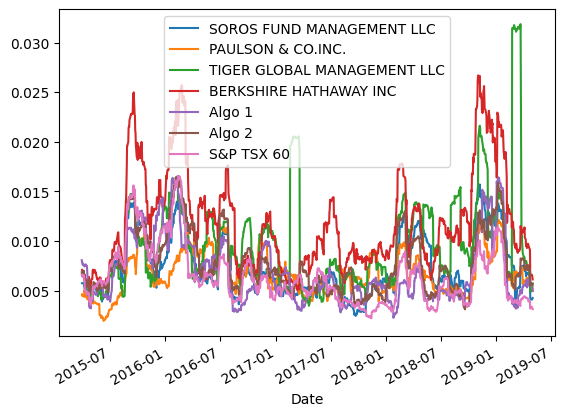

In [37]:
# Compute rolling returns for all the portfolios
column_appended_data.rolling(window=21).std().plot()

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

S&P TSX 60    0.105365
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [39]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window


<Axes: xlabel='Date'>

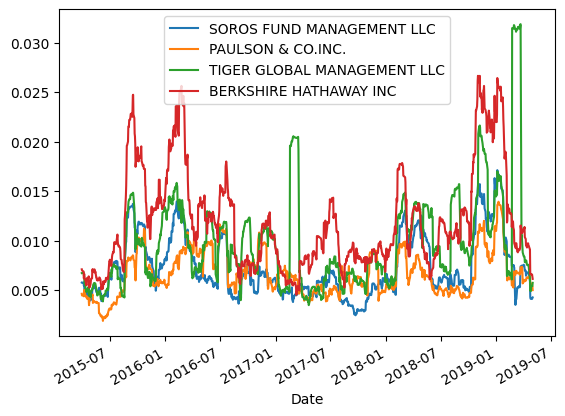

In [40]:
whale_returns.rolling(window=21).std().plot()

<Axes: xlabel='Date'>

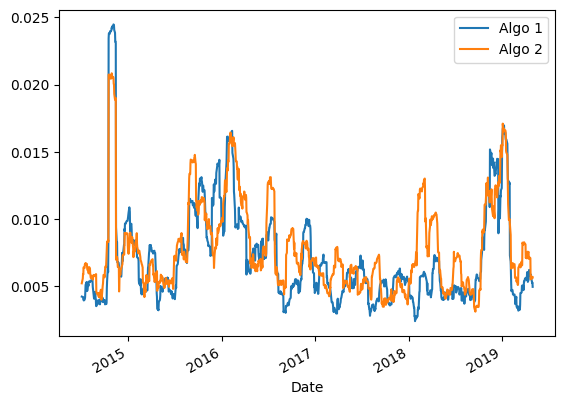

In [41]:

algo_returns.rolling(window=21).std().plot()


<Axes: xlabel='Date'>

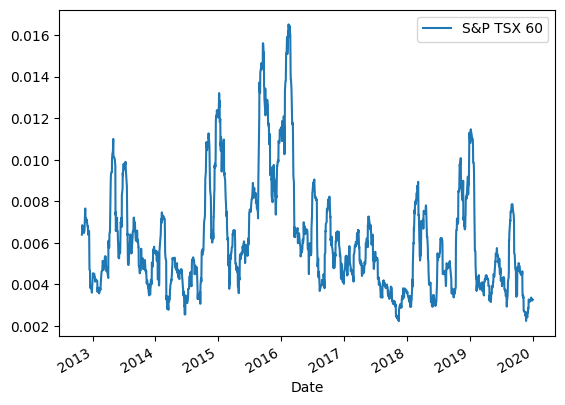

In [42]:
daily_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [43]:
# Calculate the correlation of daily returns between whale and S&P TSX 60
correlation = column_appended_data.corr()
correlation



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.284840,0.309759
Algo 2,0.826667,0.674015,0.506689,0.684609,0.284840,1.000000,0.737391
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.309759,0.737391,1.000000


In [44]:
# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [45]:
# Calculate variance of S&P TSX
variance = daily_returns['S&P TSX 60'].var()
variance

4.405458170898366e-05

In [46]:
# Calculate covariance of a single portfolio

covariance = column_appended_data["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(column_appended_data["S&P TSX 60"])
covariance


Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-25    0.000019
2019-04-26    0.000019
2019-04-29    0.000018
2019-04-30    0.000018
2019-05-01    0.000018
Length: 1030, dtype: float64

<Axes: xlabel='Date'>

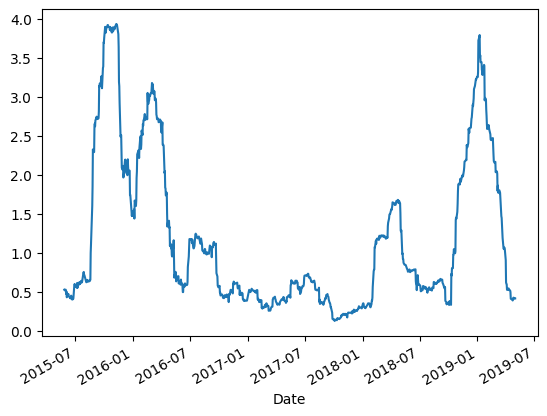

In [47]:
# Computing beta for "whale returns"
BERKSHIREHATHAWAYINC_beta = covariance / variance
BERKSHIREHATHAWAYINC_beta.plot()



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [48]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Annualized Sharpe Ratios


In [50]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [51]:
# Reading data from 1st stock


In [52]:
# Reading data from 2nd stock


In [53]:
# Reading data from 3rd stock


In [54]:
# Combine all stocks in a single DataFrame


In [55]:
# Reset Date index


In [56]:
# Reorganize portfolio data by having a column per symbol


In [57]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [58]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [59]:
# Join your returns DataFrame to the original returns DataFrame


In [60]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [61]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [62]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [63]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [64]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [65]:
# Calculate Annualized Sharpe Ratios


In [66]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!